In [1]:
import nltk
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt

from collections import defaultdict
from nltk.sentiment import SentimentIntensityAnalyzer

stopwords = nltk.corpus.stopwords.words("english")

nltk.download([
        "names",
        "stopwords",
        "state_union",
        "twitter_samples",
        "movie_reviews",
        "averaged_perceptron_tagger",
        "vader_lexicon",
        "punkt",
])

sia = SentimentIntensityAnalyzer()

[nltk_data] Downloading package names to /Users/rory/nltk_data...
[nltk_data]   Package names is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/rory/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package state_union to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package state_union is already up-to-date!
[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/rory/nltk_data...
[nltk_data]   Package vader

In [2]:
def words_(text):
    words = re.split('; |, |\*|\n| ', 
                     [''.join([' '.join(re.split('; |, |\*|\n| |[0-9]|%|&|©|[$]|-|[|]|[\']|[/]|[?]|\]|\[|[S]|[A]|[P]|[B]|[L]|[TE]',
                                               text))][0].split(r"."))][0])
    words = [' '.join(words)][0]
    return nltk.word_tokenize(words)

def words_remove_stopwords(words):
    
    words=[w for w in words if w not in stopwords]
    
    return words

def words_remove_meaningless_words(words):
    
    meaningless_words=['Thank', 'thank', 'Welcome',
                       'GAAP', 'quarter', 'million',
                       'GAAP', 'Copyright']
    
    words=[w for w in words if w not in meaningless_words]
    
    return words

def join(text):
    return [' '.join(text)]

def split_(text):
    return re.split(" ", text)

In [3]:
path='/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_analysts_question.csv'

In [4]:
data=pd.read_csv(path)
data['call_datetime']=pd.to_datetime(data['call_datetime'], format='%Y-%m-%d')
data=data.sort_values('call_datetime')

In [5]:
data.columns

Index(['time', 'call_datetime', 'call_year', 'call_month', 'call_day',
       'company_name', 'company', 'quarter', 'year_quarter',
       'analysts_question'],
      dtype='object')

In [6]:
data['analyst_text']=data['analysts_question'].apply(lambda x: words_(x))

data['analyst_text_removestopwords']=\
data['analyst_text'].apply(lambda x: words_remove_stopwords(x))

data['analyst_text_removestopwords']=\
data['analyst_text_removestopwords'].apply(lambda x: words_remove_meaningless_words(x))

In [7]:
finder = nltk.collocations.TrigramCollocationFinder.from_words(
    data['analyst_text_removestopwords'][0])

In [8]:
finder.ngram_fd.most_common(12)

[(('elaborate', 'little', 'bit'), 2),
 (('attery', 'ack', 'business'), 2),
 (('expectations', 'capital', 'spending'), 2),
 (('I', 'wanted', 'couple'), 1),
 (('wanted', 'couple', 'questions'), 1),
 (('couple', 'questions', 'On'), 1),
 (('questions', 'On', 'R'), 1),
 (('On', 'R', 'V'), 1),
 (('R', 'V', 'program'), 1),
 (('V', 'program', 'oyota'), 1),
 (('program', 'oyota', 'given'), 1),
 (('oyota', 'given', 'kind'), 1)]

In [9]:
finder = nltk.collocations.BigramCollocationFinder.from_words(
    data['analyst_text_removestopwords'][0])

In [10]:
finder.ngram_fd.most_common(10)

[(('R', 'V'), 7),
 (('little', 'bit'), 5),
 (('I', 'wanted'), 2),
 (('couple', 'questions'), 2),
 (('Model', 'Is'), 2),
 (('Is', 'something'), 2),
 (('launch', 'Model'), 2),
 (('Okay', 'Can'), 2),
 (('elaborate', 'little'), 2),
 (('attery', 'ack'), 2)]

In [11]:
finder = nltk.collocations.QuadgramCollocationFinder.from_words(
    data['analyst_text_removestopwords'][0])

In [12]:
finder.ngram_fd.most_common(5)

[(('I', 'wanted', 'couple', 'questions'), 1),
 (('wanted', 'couple', 'questions', 'On'), 1),
 (('couple', 'questions', 'On', 'R'), 1),
 (('questions', 'On', 'R', 'V'), 1),
 (('On', 'R', 'V', 'program'), 1)]

In [13]:
data['analyst_neg']=\
data['analysts_question'].apply(lambda x: sia.polarity_scores(x)['neg'])

data['analyst_pos']=\
data['analysts_question'].apply(lambda x: sia.polarity_scores(x)['pos'])

data['analyst_neu']=\
data['analysts_question'].apply(lambda x: sia.polarity_scores(x)['neu'])

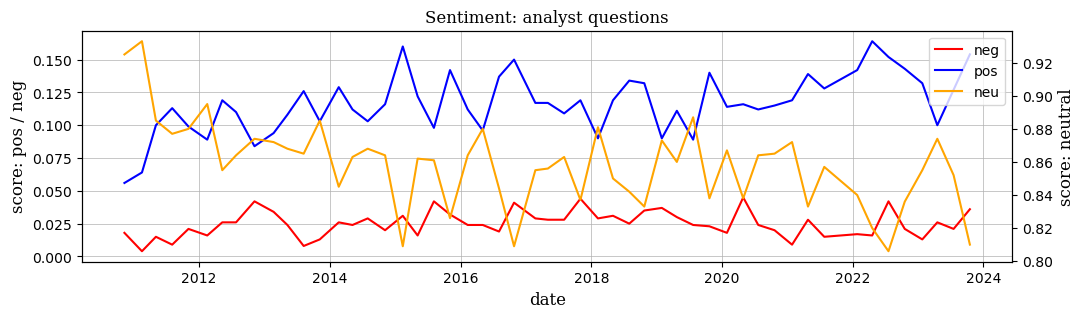

In [14]:
csfont = {'fontname':'serif'}
sizetext=12

fig, (ax1) = plt.subplots(nrows = 1, ncols = 1, figsize = (12, 3))

lns1=ax1.plot(data['call_datetime'], data['analyst_neg'], label='neg', color='r')
lns2=ax1.plot(data['call_datetime'], data['analyst_pos'], label='pos', color='b')

ax1.set_title("Sentiment: analyst questions", **csfont, size = sizetext)
ax1.set_ylabel('score: pos / neg', size = sizetext, **csfont)
ax1.set_xlabel('date', size = sizetext, **csfont)
ax1.grid(linewidth=0.5)

ax2 = ax1.twinx()
lns3=ax2.plot(data['call_datetime'], data['analyst_neu'], label='neu', color='orange')
ax2.set_ylabel('score: neutral', size = sizetext, **csfont)

lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=1)

In [15]:
data

,time,call_datetime,call_year,call_month,call_day,company_name,company,quarter,year_quarter,analysts_question,analyst_text,analyst_text_removestopwords,analyst_neg,analyst_pos,analyst_neu
0,"Tuesday, November 09, 2010 10:00 PM GMT",2010-11-09,2010,11,9,Tesla Motors,"Tesla Motors, Inc., Q3 2010 Earnings Call, Nov...",Q3,2010,"I just wanted to, a couple of questions. On th...","[I, just, wanted, to, a, couple, of, questions...","[I, wanted, couple, questions, On, R, V, progr...",0.018,0.056,0.925
1,"Tuesday, February 15, 2011 10:00 PM GMT",2011-02-15,2011,2,15,Tesla Motors,"Tesla Motors, Inc., Q4 2010 Earnings Call, Feb...",Q4,2010,Just wanted to think about how should we think...,"[Just, wanted, to, think, about, how, should, ...","[Just, wanted, think, think, cost, expectation...",0.004,0.064,0.933
2,"Wednesday, May 04, 2011 9:00 PM GMT\nS&P",2011-05-04,2011,5,4,Tesla Motors,"Tesla Motors, Inc., Q1 2011 Earnings Call, May...",Q1,2011,"So I guess a couple questions, maybe first on ...","[o, I, guess, a, couple, questions, maybe, fir...","[I, guess, couple, questions, maybe, first, ma...",0.015,0.100,0.885
3,"Wednesday, August 03, 2011 9:30 PM GMT\n",2011-08-03,2011,8,3,Tesla Motors,"Tesla Motors, Inc., Q2 2011 Earnings Call, Aug...",Q2,2011,A couple of questions. I noticed the margins o...,"[couple, of, questions, I, noticed, the, margi...","[couple, questions, I, noticed, margins, devel...",0.009,0.113,0.877
4,"Wednesday, November 02, 2011 9:30 PM GM",2011-11-02,2011,11,2,Tesla Motors,"Tesla Motors, Inc., Q3 2011 Earnings Call, Nov...",Q3,2011,"Elon, first question, the long-term supply con...","[lon, first, question, the, long, term, supply...","[lon, first, question, long, term, supply, con...",0.021,0.099,0.880
5,"Wednesday, February 15, 2012 10:30 PM G",2012-02-15,2012,2,15,Tesla Motors,"Tesla Motors, Inc., Q4 2011 Earnings Call, Feb...",Q4,2011,"Amir Rozwadowski\nBarclays Bank PLC, Research ...","[mir, Rozwadowski, arclays, ank, C, Research, ...","[mir, Rozwadowski, arclays, ank, C, Research, ...",0.016,0.089,0.895
6,"Wednesday, May 09, 2012 9:30 PM GMT\nS&P",2012-05-09,2012,5,9,Tesla Motors,"Tesla Motors, Inc., Q1 2012 Earnings Call, May...",Q1,2012,"Amir Rozwadowski\nBarclays Bank PLC, Research ...","[mir, Rozwadowski, arclays, ank, C, Research, ...","[mir, Rozwadowski, arclays, ank, C, Research, ...",0.026,0.119,0.855
7,"Wednesday, July 25, 2012 9:30 PM GMT\nS&",2012-07-25,2012,7,25,Tesla Motors,"Tesla Motors, Inc., Q2 2012 Earnings Call, Jul...",Q2,2012,"I just wondered -- so I wanted to, in terms of...","[I, just, wondered, so, I, wanted, to, in, ter...","[I, wondered, I, wanted, terms, ramp, congratu...",0.026,0.110,0.864
8,"Monday, November 05, 2012 1:00 PM GMT\nS",2012-11-05,2012,11,5,Tesla Motors,"Tesla Motors, Inc., Q3 2012 Earnings Call, Nov...",Q3,2012,"First question, how many vehicles are coming c...","[First, question, how, many, vehicles, are, co...","[First, question, many, vehicles, coming, clea...",0.042,0.084,0.874
9,"Wednesday, February 20, 2013 10:30 PM G",2013-02-20,2013,2,20,Tesla Motors,"Tesla Motors, Inc., Q4 2012 Earnings Call, Feb...",Q4,2012,So I think one of the things that investors wi...,"[o, I, think, one, of, the, things, that, inve...","[I, think, one, things, investors, focused, am...",0.034,0.094,0.872


In [16]:
path_output=\
'/Volumes/4TB/ConferenceCall/Tesla/csvfile/tesla_earning_call_analysts_question_sentiment.csv'

data.to_csv(path_output, index = False)